<a href="https://colab.research.google.com/github/mwang-cmn/Prediction-of-Health-Costs/blob/main/FreeCodecamp_Project_Prediction_of_health_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Healthcare Costs: A Freecodecamp Challenge
In this project, I will dive into the fascinating world of healthcare cost prediction. The aim of this project is to build a robust regression model that accurately estimates medical expenses. This project can be found here on  [FreeCodecamp](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)

## The Dataset

Our dataset contains a wealth of information about different patients, including features like age, gender, BMI, smoking status, and region. Each record also includes the corresponding healthcare costs. We’ll leverage this data to train and evaluate our predictive model.
I will fit and evaluate the recommended model in Tensorflow, then a Linear Regression and Random Forest for comparison.

In [62]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [63]:
from tensorflow.keras.layers.experimental import preprocessing

## Import Data and Initial exploration of data

In [64]:
sns.set_theme(style="whitegrid", palette="pastel")

In [65]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-06-17 17:42:48--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2024-06-17 17:42:48 (29.4 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [66]:
dataset.info()
#make copy
data = dataset.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
data.head()
#dataset has 1338 entries. lets look for duplicate values
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [68]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [69]:
duplicated_data= data.duplicated().sum()
duplicated_data

1

In [70]:
#Remove duplicated row
data.drop_duplicates(inplace=True)
#pop expenses column

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [71]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


## Exploratory Data Analysis
In this section, I will carry out univariate analysis on the features, then the response variables.
Additionally, i will conduct a multivariate analysis on each of the features vs the Expenses column, which is our target variable

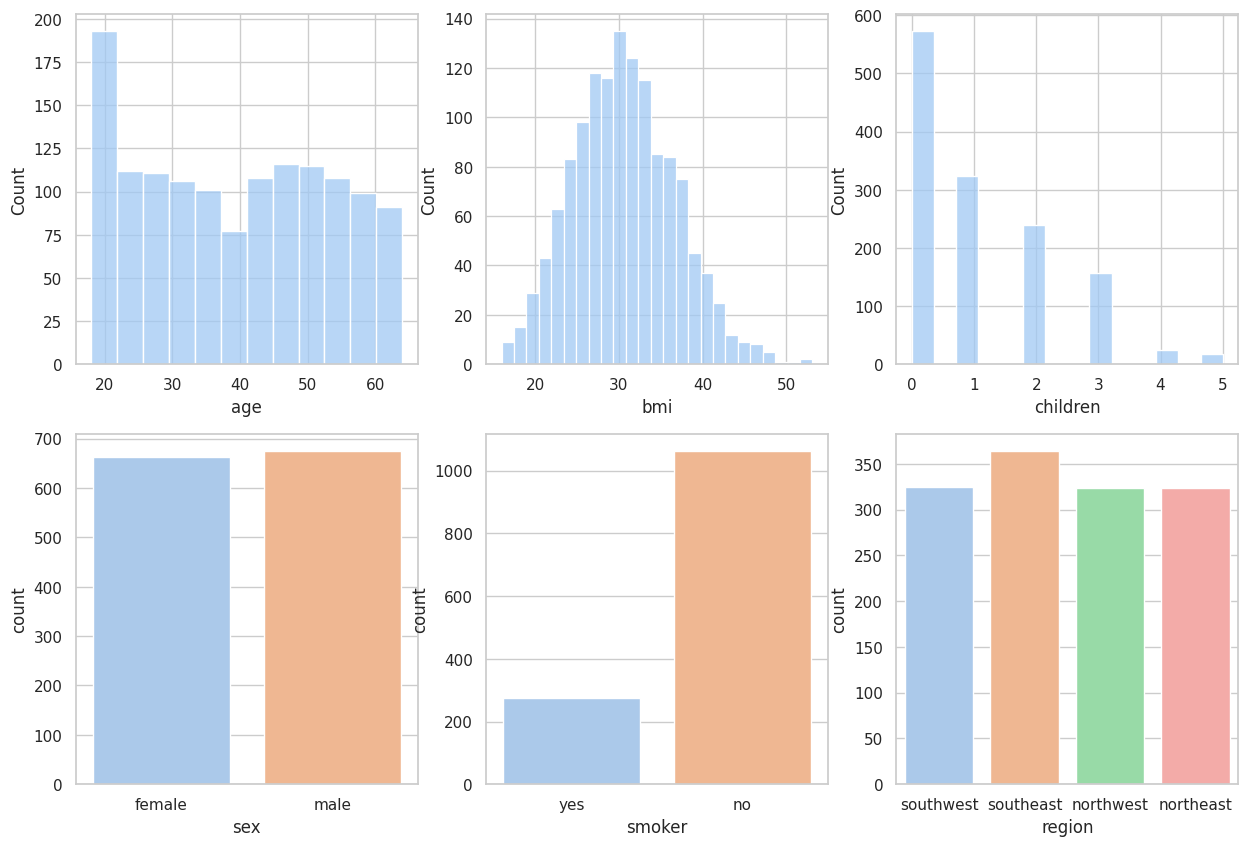

In [72]:
#Univariate analysis
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.histplot(data=data, x='age', ax=ax[0,0])
sns.histplot(data=data, x='bmi', ax=ax[0,1])
sns.histplot(data=data, x='children', ax=ax[0,2])
sns.countplot(data=data, x='sex', hue='sex', ax=ax[1,0])
sns.countplot(data=data, x='smoker', hue='smoker' ,ax=ax[1,1])
sns.countplot(data=data, x='region', hue='region',ax=ax[1,2])
plt.show()

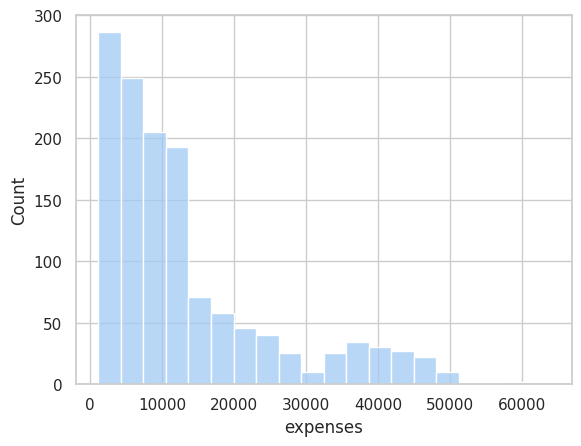

In [73]:
#Distribution of the Response variable- Expenses
sns.histplot(data=data, x='expenses', bins=20)
plt.show()

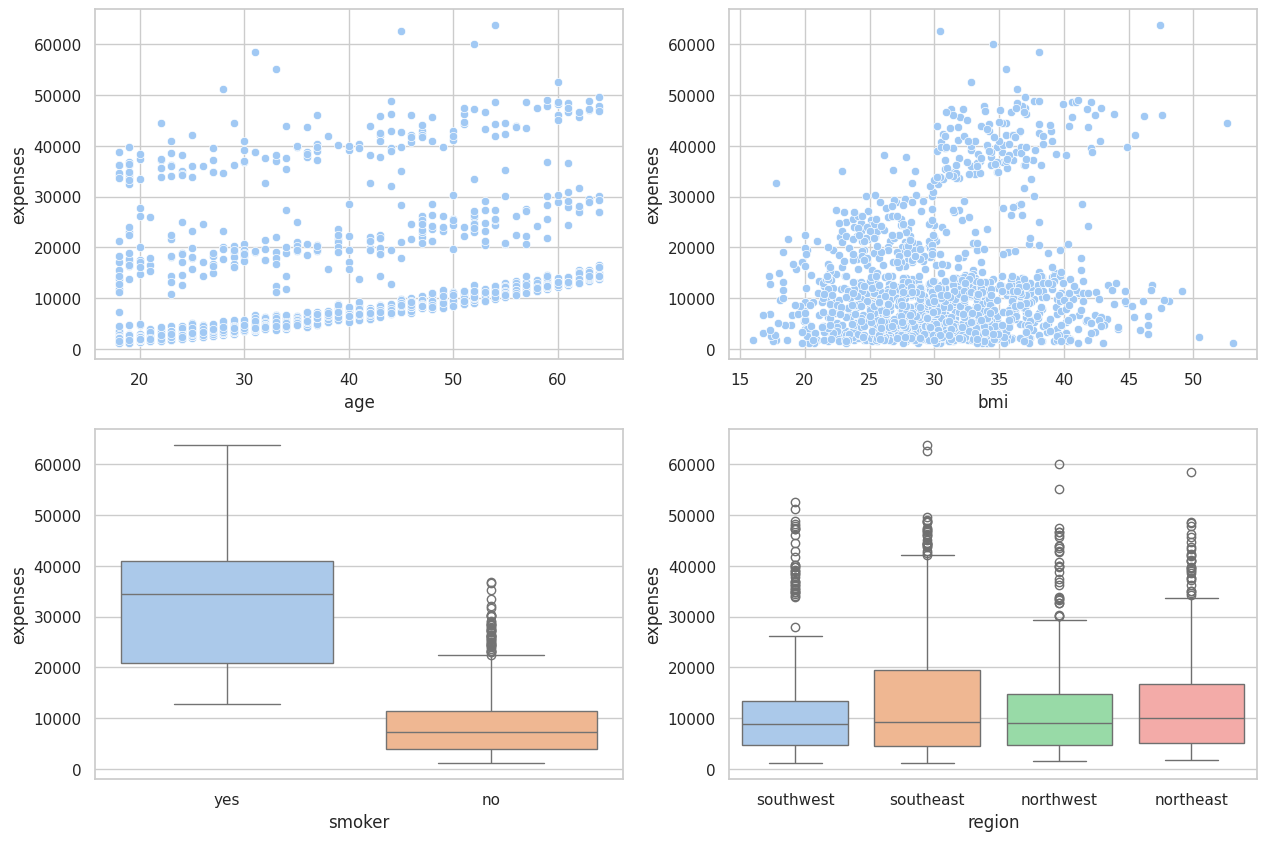

In [74]:
#Multivariate analysis
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.scatterplot(data=data, x='age', y='expenses', ax=ax[0,0])
sns.scatterplot(data=data, x='bmi', y='expenses', ax=ax[0,1])

sns.boxplot(data=data, x='smoker', y='expenses', hue='smoker', ax=ax[1,0])
sns.boxplot(data=data, x='region', y='expenses', hue='region', ax=ax[1,1])
plt.show()

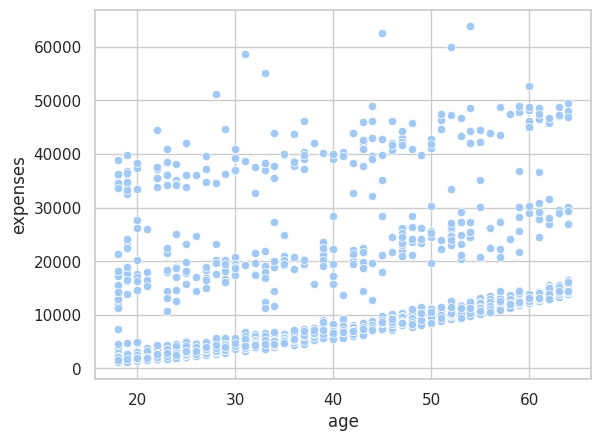

In [75]:
# scatter plot of age and expenses
sns.scatterplot(data=data, x='age', y='expenses')
plt.show()

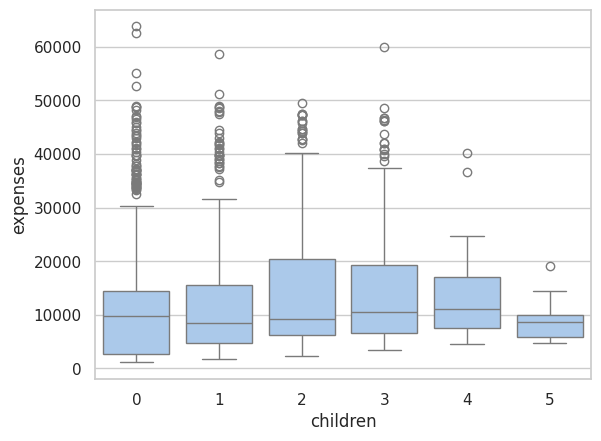

In [76]:
#children vs expenses
sns.boxplot(data=data, x='children', y='expenses')
plt.show()

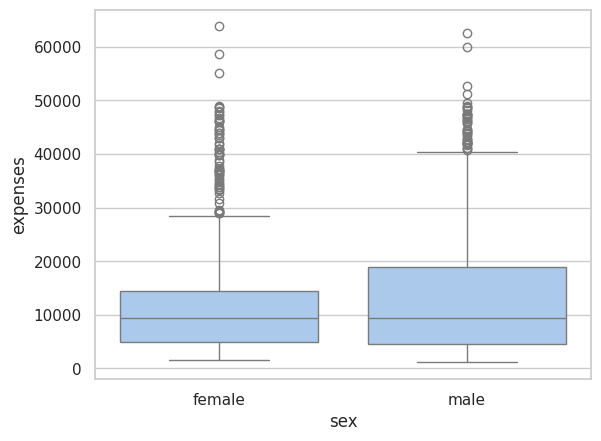

In [77]:
#sex vs expenses
sns.boxplot(data=data, x='sex', y='expenses')
plt.show()

In [78]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [79]:
#create age groups for age column
bins = [0,18,29,39,49,59,100]
labels = ['Children and Adolescents', 'Young Adults', 'Adults', 'Middle-Aged Adults', 'Seniors', 'Elderly']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data['age_group'].value_counts(normalize=True)


age_group
Young Adults                0.259536
Middle-Aged Adults          0.208676
Seniors                     0.202693
Adults                      0.192221
Elderly                     0.085266
Children and Adolescents    0.051608
Name: proportion, dtype: float64

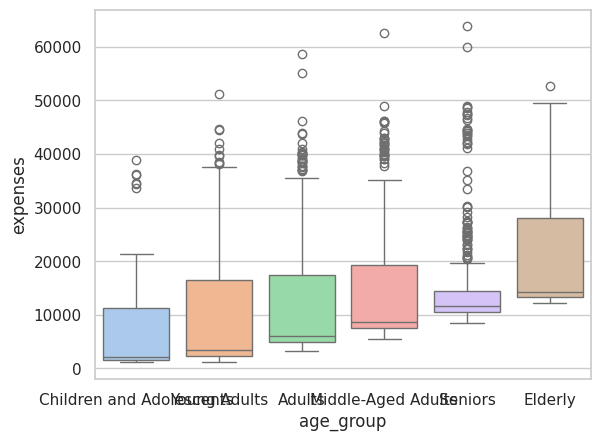

In [80]:
# Age Group vs. Expenses
sns.boxplot(data=data, x='age_group', y='expenses', hue='age_group')
plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1337 non-null   int64   
 1   sex        1337 non-null   object  
 2   bmi        1337 non-null   float64 
 3   children   1337 non-null   int64   
 4   smoker     1337 non-null   object  
 5   region     1337 non-null   object  
 6   expenses   1337 non-null   float64 
 7   age_group  1337 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 85.1+ KB


In [82]:
#Multicollinearity heatmap
#sns.heatmap(data.corr(), annot=True)
#plt.show()

### Encoding Categorical columns

In [83]:
data['sex'] = data['sex'].astype('category')
data['children'] = data['children'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1337 non-null   int64   
 1   sex        1337 non-null   category
 2   bmi        1337 non-null   float64 
 3   children   1337 non-null   category
 4   smoker     1337 non-null   category
 5   region     1337 non-null   category
 6   expenses   1337 non-null   float64 
 7   age_group  1337 non-null   category
dtypes: category(5), float64(2), int64(1)
memory usage: 49.2 KB


In [84]:
sex_dummy = pd.get_dummies(data['sex'])
smoker_dummy = pd.get_dummies(data['smoker'])
region_dummy = pd.get_dummies(data['region'])
age_group_dummy = pd.get_dummies(data['age_group'])
data = pd.concat([data,sex_dummy,smoker_dummy,region_dummy, age_group_dummy], axis=1)

In [85]:
data.drop(['sex','smoker','region','age_group','age'], axis=1, inplace=True)
data.head()

,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest,Children and Adolescents,Young Adults,Adults,Middle-Aged Adults,Seniors,Elderly
0,27.9,0,16884.92,True,False,False,True,False,False,False,True,False,True,False,False,False,False
1,33.8,1,1725.55,False,True,True,False,False,False,True,False,True,False,False,False,False,False
2,33.0,3,4449.46,False,True,True,False,False,False,True,False,False,True,False,False,False,False
3,22.7,0,21984.47,False,True,True,False,False,True,False,False,False,False,True,False,False,False
4,28.9,0,3866.86,False,True,True,False,False,True,False,False,False,False,True,False,False,False


In [86]:
#dummies for children
data = pd.get_dummies(data, columns=['children'])
data.head()

,bmi,expenses,female,male,no,yes,northeast,northwest,southeast,southwest,...,Adults,Middle-Aged Adults,Seniors,Elderly,children_0,children_1,children_2,children_3,children_4,children_5
0,27.9,16884.92,True,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,33.8,1725.55,False,True,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,33.0,4449.46,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,22.7,21984.47,False,True,True,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
4,28.9,3866.86,False,True,True,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi                       1337 non-null   float64
 1   expenses                  1337 non-null   float64
 2   female                    1337 non-null   bool   
 3   male                      1337 non-null   bool   
 4   no                        1337 non-null   bool   
 5   yes                       1337 non-null   bool   
 6   northeast                 1337 non-null   bool   
 7   northwest                 1337 non-null   bool   
 8   southeast                 1337 non-null   bool   
 9   southwest                 1337 non-null   bool   
 10  Children and Adolescents  1337 non-null   bool   
 11  Young Adults              1337 non-null   bool   
 12  Adults                    1337 non-null   bool   
 13  Middle-Aged Adults        1337 non-null   bool   
 14  Seniors      

# Model Selection and Evaluation

In [88]:
#libraries for linear regression, split data, mae
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model

In [89]:
#split data using 0.2 as test size
X = data.drop('expenses', axis=1)
y = data['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#Normalize the y variable
y_train = (y_train - y_train.mean()) / y_train.std()
y_test = (y_test - y_test.mean()) / y_test.std()

In [91]:
#initialize  model
model_lr = LinearRegression()
#fit the data
model_lr.fit(X_train, y_train)
#mean absolute error
y_pred = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.32


In [92]:
#Accuracy of model
model_lr.score(X_test, y_test)

0.8038970491669726

# TensorFlow

In [93]:
#Make sure to convert categorical data to numbers. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [94]:
train_features.head()

,bmi,female,male,no,yes,northeast,northwest,southeast,southwest,Children and Adolescents,...,Adults,Middle-Aged Adults,Seniors,Elderly,children_0,children_1,children_2,children_3,children_4,children_5
1248,39.8,True,False,True,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
610,29.4,True,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
393,31.4,False,True,True,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
503,30.3,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
198,18.1,True,False,True,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [95]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')
#Normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = len(train_features), activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

model_history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    validation_split = 0.2,
    verbose=0
)

test_results = {}
loss, mae, mse= model.evaluate(test_features, test_labels, verbose=2)
test_dataset = test_features



9/9 - 0s - loss: 2660.3872 - mae: 2660.3872 - mse: 28715502.0000 - 65ms/epoch - 7ms/step


In [96]:
#Testing the model
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose = 2)

print("Testing set Mean Absolute Error: {:5.2f} expenses".format(mae))
if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Absolute Error must be less than 3500. Keep trying.")

9/9 - 0s - loss: 2660.3872 - mae: 2660.3872 - mse: 28715502.0000 - 123ms/epoch - 14ms/step
Testing set Mean Absolute Error: 2660.39 expenses
You passed the challenge. Great job!


In [97]:
#get predictions
test_predictions = model.predict(test_dataset).flatten()

9/9 [==============================] - 0s 4ms/step


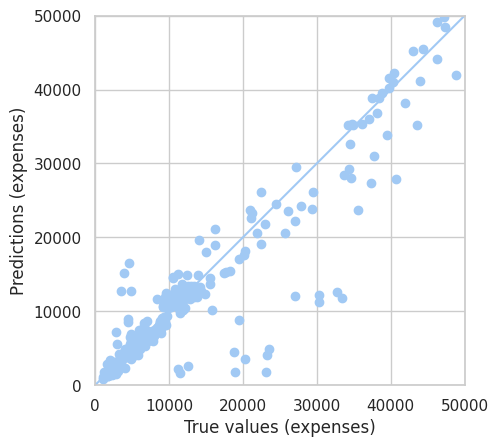

In [98]:
#Plot Actual values vs Predicted values
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

# Random Forest Model

In [99]:
#fit a random forest model and obtain accuracy

from sklearn.ensemble import RandomForestRegressor
# Create a random forest model
model2 = RandomForestRegressor()

# Train the model
model2.fit(X_train, y_train)

# Evaluate the model
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 2:")
print("MSE:", mse)
print("R2:", r2)


Model 2:
MSE: 0.1521556040809844
R2: 0.8472745247426823


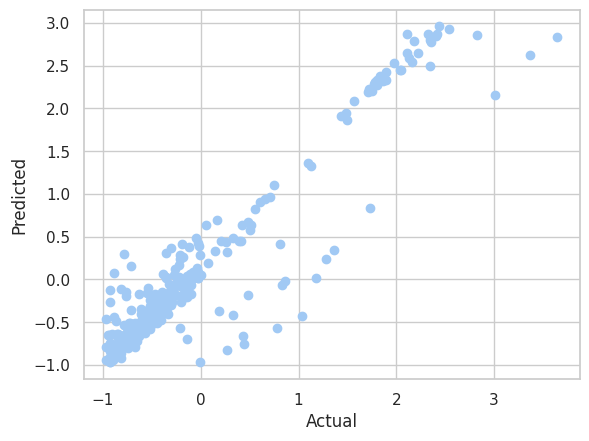

In [100]:
#plot actuals vs predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()